In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../../Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [4]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

y = X[:, -1]
X = X[:, :-1]

In [7]:
X = X - X.mean(axis=0) / X.std(axis=0)

In [8]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.825
0.853125


0


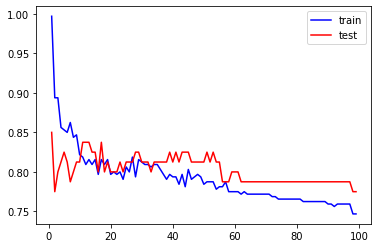

In [11]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for k in range(1, 100):
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    clf.fit(X_train, y_train)

    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    

plt.plot(np.arange(1, 100, 1), np.array(train_scores), 'b-', label='train')
plt.plot(np.arange(1, 100, 1), np.array(test_scores), 'r-', label='test')
plt.legend()

print(np.array(test_scores).argmax())